# Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
#import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm, feature_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
df20 = pd.read_csv("/content/drive/MyDrive/Amit-Project/finaldata.csv")
df19 = pd.read_csv("/content/drive/MyDrive/Amit-Project/finaldata19.csv")
df18 = pd.read_csv("/content/drive/MyDrive/Amit-Project/finaldata18.csv")

In [ ]:
df20 = df20[["SEX","ADPAIN42","REGION20","RACETHX", "MARRY20X", "CANCERDX",'Drug', 'dosage','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42', "optimaldosage", "lowdosage"]]
df20.head()

,SEX,ADPAIN42,REGION20,RACETHX,MARRY20X,CANCERDX,Drug,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,optimaldosage,lowdosage
0,2,3,3,1,5,2,mirt,15.0,NaN,5.0,2,1,-15.0,1.0,0.0
1,2,1,4,2,1,1,traz,50.0,NaN,4.0,2,1,24.3,0.0,1.0
2,2,-1,4,2,1,2,venl,150.0,3.0,3.0,2,2,-1.0,1.0,0.0
3,2,1,2,2,1,2,cita,20.0,NaN,3.0,2,2,34.2,1.0,0.0
4,2,4,2,2,2,1,sert,NaN,NaN,5.0,2,1,23.2,NaN,NaN


In [ ]:
df20.rename(columns={df20.columns[2]: 'REGION', df20.columns[4]: 'MARRY'},inplace=True)

<ipython-input-6-2ac37d8d3b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20.rename(columns={df20.columns[2]: 'REGION', df20.columns[4]: 'MARRY'},inplace=True)


In [ ]:
df19 = df19[["SEX","ADPAIN42","REGION19","RACETHX", "MARRY19X", "CANCERDX",'Drug', 'dosage','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI19', "optimaldosage", "lowdosage"]]

In [ ]:
df19.rename(columns={df19.columns[2]: 'REGION', df19.columns[4]: 'MARRY', df19.columns[12] : 'ADBMI42'},inplace=True)

<ipython-input-8-234b108e513c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19.rename(columns={df19.columns[2]: 'REGION', df19.columns[4]: 'MARRY', df19.columns[12] : 'ADBMI42'},inplace=True)


In [ ]:
df18 = df18[["SEX","ADPAIN42","REGION18","RACETHX", "MARRY18X", "CANCERDX",'Drug', 'dosage','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42', "optimaldosage", "lowdosage"]]

In [ ]:
df18.rename(columns={df18.columns[2]: 'REGION', df18.columns[4]: 'MARRY'},inplace=True)

In [ ]:
df = pd.concat([df18,df19,df20])

In [ ]:
df = df[df["Drug"] != "other"]

In [ ]:
df.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,Drug,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,optimaldosage,lowdosage
0,2.0,1.0,2.0,2.0,1.0,2.0,fluo,NaN,1.0,1.0,2.0,2.0,21.4,NaN,NaN
1,1.0,1.0,2.0,2.0,1.0,2.0,fluo,20.0,1.0,1.0,2.0,2.0,30.6,1.0,0.0
2,2.0,1.0,2.0,2.0,1.0,2.0,sert,100.0,2.0,2.0,2.0,2.0,28.9,1.0,0.0
3,2.0,4.0,3.0,2.0,2.0,2.0,cita,NaN,3.0,5.0,2.0,1.0,30.1,NaN,NaN
4,2.0,3.0,2.0,1.0,1.0,2.0,antipsychotic,60.0,1.0,4.0,2.0,2.0,25.1,0.0,0.0


In [ ]:
drug_dict= {'amit':0,'amox':1,'bupr':2,'cita':3,'clom':4,'desi':5,'desv':6,'doxe':7,
            'dulo':8,'esci':9,'fluo':10,'imip':11,'levo':12,'mirt':13,'nefa':14,'nort':15,'paro':16,
           'prot':17,'sert':18,'traz':19, 'trim':20,'venl':21,'vila':22,'vort':23,'benzo':24,
            'moodstabilizer':25,'antipsychotic':26}

In [ ]:
# Remap the values of the dataframe
df  = df.replace({"Drug": drug_dict})

df.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,Drug,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,optimaldosage,lowdosage
0,2.0,1.0,2.0,2.0,1.0,2.0,10,NaN,1.0,1.0,2.0,2.0,21.4,NaN,NaN
1,1.0,1.0,2.0,2.0,1.0,2.0,10,20.0,1.0,1.0,2.0,2.0,30.6,1.0,0.0
2,2.0,1.0,2.0,2.0,1.0,2.0,18,100.0,2.0,2.0,2.0,2.0,28.9,1.0,0.0
3,2.0,4.0,3.0,2.0,2.0,2.0,3,NaN,3.0,5.0,2.0,1.0,30.1,NaN,NaN
4,2.0,3.0,2.0,1.0,1.0,2.0,26,60.0,1.0,4.0,2.0,2.0,25.1,0.0,0.0


In [ ]:
a = df["Drug"].unique()

a.sort()
print(a)

[ 0  3  9 10 13 15 16 18 19 21 22 23 26]


In [ ]:
df = df[df["Drug"] != 'other']

In [ ]:
df["Drug"] = pd.to_numeric(df["Drug"])

In [ ]:
df.shape

(9370, 15)

In [ ]:
df.to_csv("final_data_20-03-2023.csv")

# Predictions for the optimal dosage as an output

In [ ]:
df1 = df[["SEX","ADPAIN42","REGION","RACETHX", "MARRY", "CANCERDX",'Drug','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42', "optimaldosage"]]

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2["Drug"] = df1["Drug"]

In [ ]:
df1.isna().sum()

SEX                 0
ADPAIN42            0
REGION              0
RACETHX             0
MARRY               0
CANCERDX            0
Drug                0
durationcat       949
agecat            492
DIABDX_M18          0
ARTHDX              0
ADBMI42          3186
optimaldosage    2614
dtype: int64

In [ ]:
gb = df1.groupby(by=['Drug'], as_index=False)
def replace(g):
   mask = g<0
   g.loc[mask] = g[~mask].mean()
   return g
df1 = gb.transform(replace)

In [ ]:
df1.shape

(9370, 12)

In [ ]:
df1[df1 < 0].count()

SEX              0
ADPAIN42         0
REGION           0
RACETHX          0
MARRY            0
CANCERDX         0
durationcat      0
agecat           0
DIABDX_M18       0
ARTHDX           0
ADBMI42          0
optimaldosage    0
dtype: int64

In [ ]:
df1["Drug"] = df2["Drug"]

In [ ]:
df1["ADBMI42"] = df1["ADBMI42"].fillna(df1["ADBMI42"].mean())
df1["durationcat"] = df1["durationcat"].fillna(round(df1["durationcat"].mean()))
df1["agecat"] = df1["agecat"].fillna(round(df1["agecat"].mean()))

In [ ]:
df1.isna().sum()

SEX                 0
ADPAIN42            0
REGION              0
RACETHX             0
MARRY               0
CANCERDX            0
durationcat         0
agecat              0
DIABDX_M18          0
ARTHDX              0
ADBMI42             0
optimaldosage    2614
Drug                0
dtype: int64

In [ ]:
drug_dict= {'amit':0,'amox':1,'bupr':2,'cita':3,'clom':4,'desi':5,'desv':6,'doxe':7,
            'dulo':8,'esci':9,'fluo':10,'imip':11,'levo':12,'mirt':13,'nefa':14,'nort':15,'paro':16,
           'prot':17,'sert':18,'traz':19, 'trim':20,'venl':21,'vila':22,'vort':23,'benzo':24,
            'moodstabilizer':25,'antipsychotic':26}

In [ ]:
# Remap the values of the dataframe
df1  = df1.replace({"Drug": drug_dict})

df1.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,optimaldosage,Drug
0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,21.4,NaN,10
1,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,30.6,1.0,10
2,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,28.9,1.0,18
3,2.0,4.0,3.0,2.0,2.0,2.0,3.0,5.0,2.0,1.0,30.1,NaN,3
4,2.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,25.1,0.0,26


In [ ]:
df1["Drug"] = pd.to_numeric(df1["Drug"])

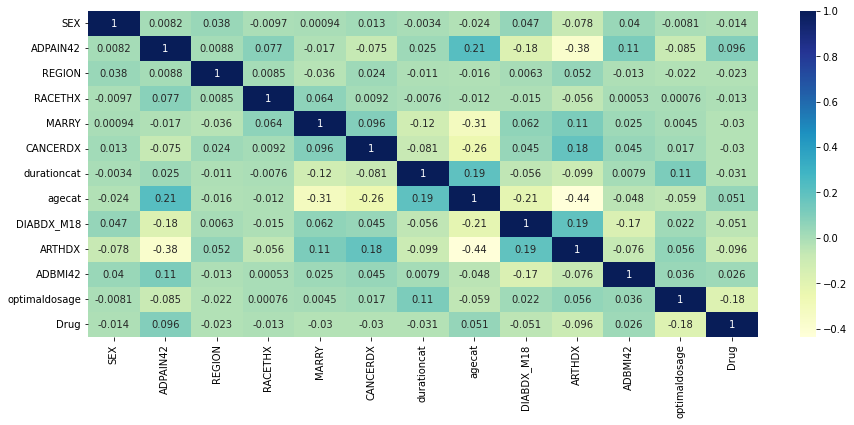

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(15,6))

dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

plt.savefig('correlation_optimal')
# displaying heatmap
plt.show()

In [ ]:
df1.dropna(inplace=True)
df1.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,optimaldosage,Drug
1,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,30.6,1.0,10
2,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,28.9,1.0,18
4,2.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,25.1,0.0,26
5,2.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,32.3,1.0,9
6,2.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,25.1,1.0,18


In [ ]:
df1.shape

(6756, 13)

## Handling Class Imbalance Problem

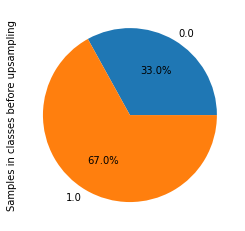

In [ ]:
df1.groupby('optimaldosage').size().plot(kind='pie',
                                       y = "optimaldosage",
                                       label = "Samples in classes before upsampling",
                                       autopct='%1.1f%%')
plt.savefig('samples_before_upsampling_optimal.png')

In [ ]:
optimal = df1[df1["optimaldosage"] == 1]
notoptimal  = df1[df1["optimaldosage"] == 0]

In [ ]:
from sklearn.utils import resample
notoptimal_upsample = resample(notoptimal,
             replace=True,
             n_samples=len(optimal),
             random_state=42)

print(notoptimal_upsample.shape)

(4524, 13)


1.0    4524
0.0    4524
Name: optimaldosage, dtype: int64


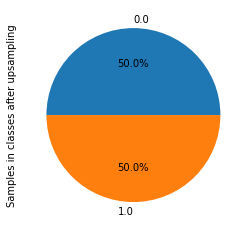

In [ ]:
data_upsampled = pd.concat([optimal, notoptimal_upsample])

print(data_upsampled["optimaldosage"].value_counts())

data_upsampled.groupby('optimaldosage').size().plot(kind='pie',
                                       y = "optimaldosage",
                                       label = "Samples in classes after upsampling",
                                       autopct='%1.1f%%')
plt.savefig('samples_after_upsampling_optimal')

In [ ]:
data_upsampled.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,optimaldosage,Drug
1,1.0,1.000000,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,30.6,1.0,10
2,2.0,1.000000,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,28.9,1.0,18
5,2.0,4.000000,4.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,32.3,1.0,9
6,2.0,1.000000,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,25.1,1.0,18
7,2.0,2.092999,2.0,2.0,3.0,2.0,1.0,5.0,2.0,1.0,31.4,1.0,9


In [ ]:
X = data_upsampled.drop(["optimaldosage"], axis=1)
y = data_upsampled["optimaldosage"]

## Plotting to show impact of upsampling

In [ ]:
df1['Drug'].unique()

array([10, 18, 26,  9, 19,  3,  0, 21, 16, 13, 23, 15, 22])

In [ ]:
len(df1["Drug"].unique())

13

In [ ]:
a = df1["Drug"].unique()

In [ ]:
a = [x for x,y in drug_dict.items() if y in a]
print(a)

['amit', 'cita', 'esci', 'fluo', 'mirt', 'nort', 'paro', 'sert', 'traz', 'venl', 'vila', 'vort', 'antipsychotic']


In [ ]:
type(a)

list

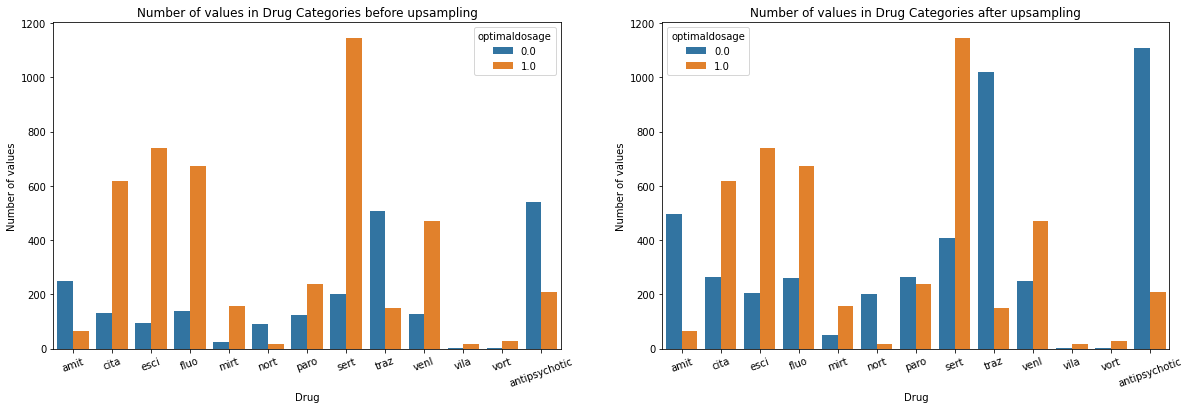

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))

plt.subplot(1, 2, 1)

sns.countplot(data=df1,x='Drug',hue='optimaldosage')
plt.title("Number of values in Drug Categories before upsampling")
plt.ylabel("Drug Category")
plt.ylabel("Number of values")
plt.xticks(range(len(df1['Drug'].unique())), a, rotation=20)


plt.subplot(1, 2, 2)
sns.countplot(data=data_upsampled,x='Drug',hue='optimaldosage')
plt.title("Number of values in Drug Categories after upsampling")
plt.ylabel("Drug Category")
plt.ylabel("Number of values")
plt.xticks(range(len(data_upsampled['Drug'].unique())), a, rotation=20)

plt.savefig('Impact_of_upsampling.png')

plt.show()


## Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
lr_model = LogisticRegression().fit(X_train,y_train)
lr_predictions= lr_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy_score(y_test, lr_predictions).round(2)


0.63

<Axes: >

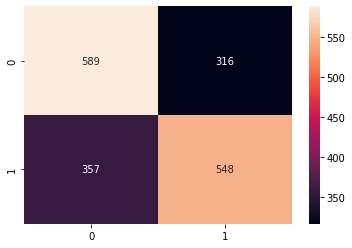

In [ ]:
cf = confusion_matrix(y_test,lr_predictions) 
sns.heatmap(cf, annot=True, fmt='g')

In [ ]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
rf_predictions= rf_model.predict(X_test)
accuracy_score(y_test, rf_predictions).round(2)

0.9

<Axes: >

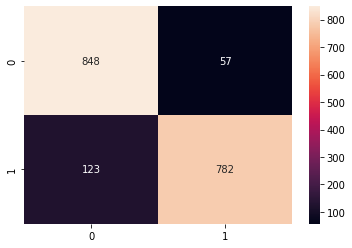

In [ ]:
cf1 = confusion_matrix(y_test,rf_predictions) 
sns.heatmap(cf1, annot=True, fmt='g')



<ipython-input-155-20becc82936c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-155-20becc82936c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


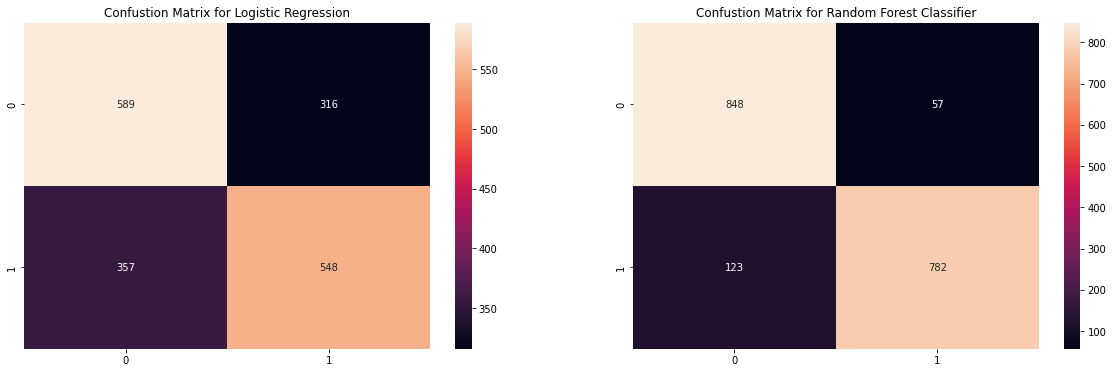

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cf, annot=True, fmt='g')
plt.title("Confustion Matrix for Logistic Regression")
plt.subplot(1, 2, 2)
sns.heatmap(cf1, annot=True, fmt='g')
plt.title("Confustion Matrix for Random Forest Classifier")

plt.savefig("confusion_matrix_optimal")
plt.show()

Feature: 0, Score: 0.03456
Feature: 1, Score: 0.09738
Feature: 2, Score: 0.08197
Feature: 3, Score: 0.05426
Feature: 4, Score: 0.07239
Feature: 5, Score: 0.02583
Feature: 6, Score: 0.04679
Feature: 7, Score: 0.06898
Feature: 8, Score: 0.02582
Feature: 9, Score: 0.02958
Feature: 10, Score: 0.16738
Feature: 11, Score: 0.29506


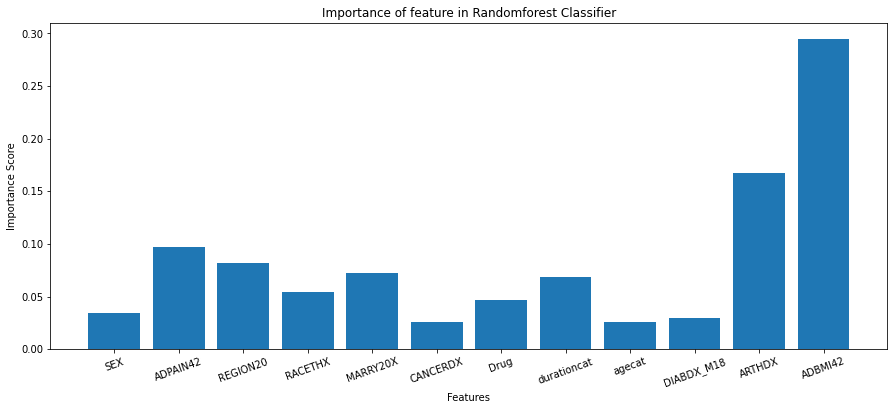

In [ ]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(15,6))
plt.title("Importance of feature in Randomforest Classifier")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(range(len(df1.columns)-1),["SEX","ADPAIN42","REGION20","RACETHX", "MARRY20X", "CANCERDX",'Drug','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42'],
       rotation=20)  # Set text labels and properties. 

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('important_features.png')
plt.show()


## Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 20, 40],
    'max_leaf_nodes': [3, 6, 9, 20, 30, 40],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=40,
                       n_estimators=50)


In [ ]:
tuned_model = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=20,
                       n_estimators=200)

tuned_model.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       970
         1.0       0.87      0.93      0.90       840

    accuracy                           0.90      1810
   macro avg       0.90      0.91      0.90      1810
weighted avg       0.91      0.90      0.90      1810



<AxesSubplot:>

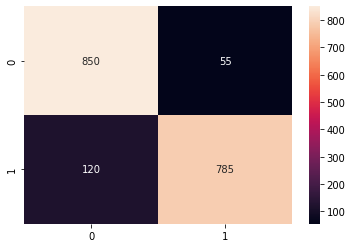

In [ ]:
cf_tuned = confusion_matrix(y_test,y_pred_grid) 
sns.heatmap(cf_tuned, annot=True, fmt='g')

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=40,
                       n_estimators=200)


In [ ]:
model_random = RandomForestClassifier(max_depth=20,
                                      max_features=None,
                                      max_leaf_nodes=20,
                                      n_estimators=25)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       970
         1.0       0.87      0.93      0.90       840

    accuracy                           0.90      1810
   macro avg       0.90      0.91      0.90      1810
weighted avg       0.91      0.90      0.90      1810



<AxesSubplot:>

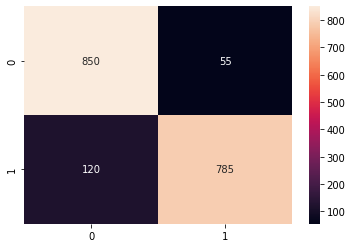

In [ ]:
cf_tuned = confusion_matrix(y_test,y_pred_rand) 
sns.heatmap(cf_tuned, annot=True, fmt='g')


### Model Plotting

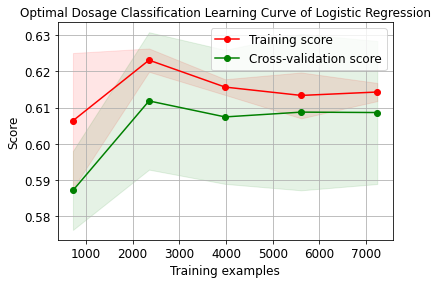

In [ ]:
skplt.estimators.plot_learning_curve(LogisticRegression(), X, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Optimal Dosage Classification Learning Curve of Logistic Regression");

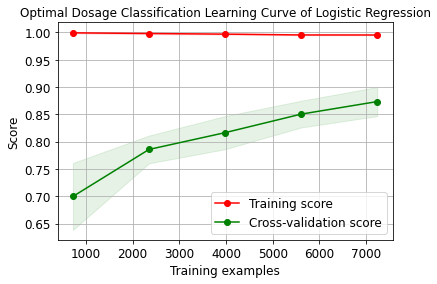

In [ ]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(), X, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Optimal Dosage Classification Learning Curve of  Random Forest Classifier");

In [ ]:
rf_preditprob = rf_model.predict_proba(X_test)
lr_preditprob = lr_model.predict_proba(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


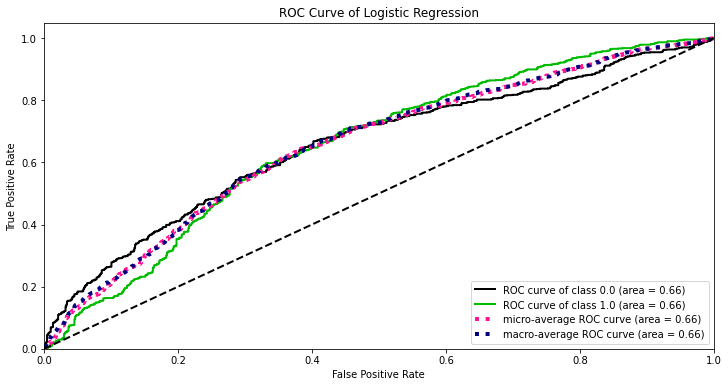

In [ ]:
rf_preditprob = lr_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, rf_preditprob,title="ROC Curve of Logistic Regression", figsize=(12,6));

plt.savefig('roc_curve_lr_optimal.png')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


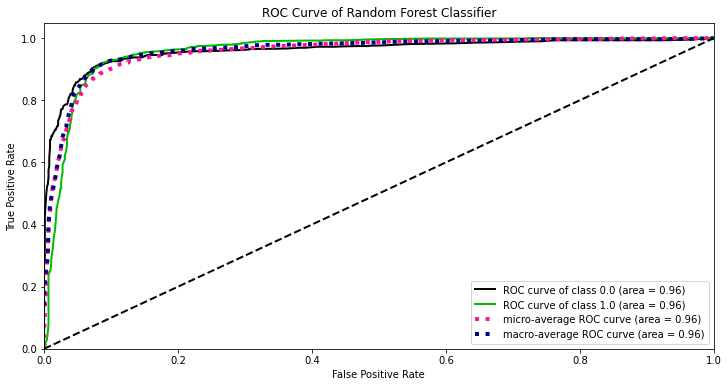

In [ ]:
rf_preditprob = rf_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, rf_preditprob,title="ROC Curve of Random Forest Classifier", figsize=(12,6));
plt.savefig('roc_curve_rf_optimal.png')

# Predictions for the Low dosage as an output

In [ ]:
df_low = df[["SEX","ADPAIN42","REGION","RACETHX", "MARRY", "CANCERDX",'Drug','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42', "lowdosage"]]

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2["Drug"] = df_low["Drug"]

In [ ]:
df_low.isna().sum()

SEX               0
ADPAIN42          0
REGION            0
RACETHX           0
MARRY             0
CANCERDX          0
Drug              0
durationcat     949
agecat          492
DIABDX_M18        0
ARTHDX            0
ADBMI42        3186
lowdosage      2617
dtype: int64

In [ ]:
gb = df_low.groupby(by=['Drug'], as_index=False)
def replace(g):
   mask = g<0
   g.loc[mask] = g[~mask].mean()
   return g
df_low = gb.transform(replace)

In [ ]:
df_low.shape

(9370, 12)

In [ ]:
df_low[df_low < 0].count()

SEX            0
ADPAIN42       0
REGION         0
RACETHX        0
MARRY          0
CANCERDX       0
durationcat    0
agecat         0
DIABDX_M18     0
ARTHDX         0
ADBMI42        0
lowdosage      0
dtype: int64

In [ ]:
df_low["Drug"] = df2["Drug"]

In [ ]:
df_low["ADBMI42"] = df_low["ADBMI42"].fillna(df_low["ADBMI42"].mean())
df_low["durationcat"] = df_low["durationcat"].fillna(round(df_low["durationcat"].mean()))
df_low["agecat"] = df_low["agecat"].fillna(round(df_low["agecat"].mean()))

In [ ]:
drug_dict= {'amit':0,'amox':1,'bupr':2,'cita':3,'clom':4,'desi':5,'desv':6,'doxe':7,
            'dulo':8,'esci':9,'fluo':10,'imip':11,'levo':12,'mirt':13,'nefa':14,'nort':15,'paro':16,
           'prot':17,'sert':18,'traz':19, 'trim':20,'venl':21,'vila':22,'vort':23,'benzo':24,
            'moodstabilizer':25,'antipsychotic':26}

In [ ]:
# Remap the values of the dataframe
df_low  = df_low.replace({"Drug": drug_dict})

df_low.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,lowdosage,Drug
0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,21.4,NaN,10
1,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,30.6,0.0,10
2,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,28.9,0.0,18
3,2.0,4.0,3.0,2.0,2.0,2.0,3.0,5.0,2.0,1.0,30.1,NaN,3
4,2.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,25.1,0.0,26


In [ ]:
df_low["Drug"] = pd.to_numeric(df_low["Drug"])

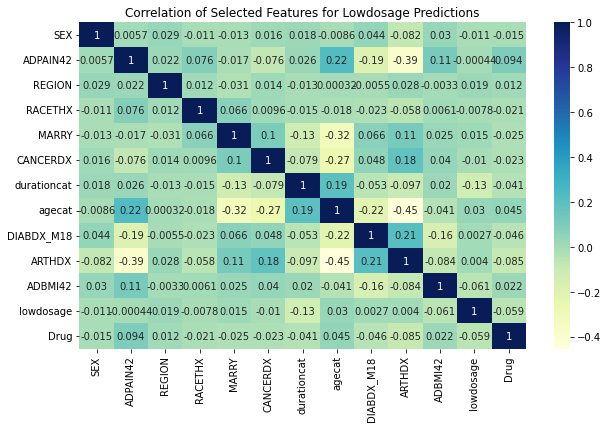

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(10,6))

dataplot = sns.heatmap(df_low.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation of Selected Features for Lowdosage Predictions")
plt.savefig("lowdosage_corr.jpg")
# displaying heatmap
plt.show()

In [ ]:
df_low.dropna(inplace=True)
df_low.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,lowdosage,Drug
1,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,30.6,0.0,10
2,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,28.9,0.0,18
4,2.0,3.0,2.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,25.1,0.0,26
5,2.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,1.0,1.0,32.3,0.0,9
6,2.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,25.1,0.0,18


In [ ]:
df_low.shape

(6753, 13)

## Handling Class Imbalance Problem

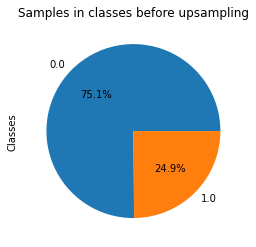

In [ ]:
df_low.groupby('lowdosage').size().plot(kind='pie',
                                       y = "optimaldosage",
                                       label = "Classes",
                                       autopct='%1.1f%%')
plt.title("Samples in classes before upsampling")
plt.savefig('samples_before_upsampling_lowdosage.jpg')

In [ ]:
low = df_low[df_low["lowdosage"] == 1]
notlow  = df_low[df_low["lowdosage"] == 0]

In [ ]:
from sklearn.utils import resample
low_upsample = resample(low,
             replace=True,
             n_samples=len(notlow),
             random_state=42)

print(low_upsample.shape)

(5073, 13)


1.0    5073
0.0    5073
Name: lowdosage, dtype: int64


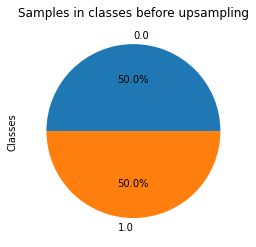

In [ ]:
low_upsample = pd.concat([low_upsample, notlow])

print(low_upsample["lowdosage"].value_counts())

low_upsample.groupby('lowdosage').size().plot(kind='pie',
                                       y = "lowdosage",
                                       label="Classes",
                                       autopct='%1.1f%%')
plt.title("Samples in classes before upsampling")
plt.savefig('samples_after_upsampling_lowdosage.jpg')

In [ ]:
low_upsample.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,lowdosage,Drug
2978,2.0,1.000000,2.0,2.0,1.0,2.000000,2.0,4.0,2.0,1.000000,30.014962,1.0,9
1749,2.0,2.218789,3.0,2.0,6.0,1.848126,1.0,4.0,2.0,1.576923,31.222266,1.0,4
1530,2.0,3.000000,3.0,2.0,1.0,2.000000,3.0,4.0,2.0,1.000000,30.014962,1.0,8
771,1.0,5.000000,4.0,2.0,3.0,2.000000,3.0,5.0,1.0,1.000000,32.100000,1.0,0
3010,1.0,1.000000,2.0,1.0,5.0,2.000000,1.0,1.0,2.0,2.000000,30.014962,1.0,9


## Plotting to see the impact of upsampling

In [ ]:
a = df_low["Drug"].unique()

In [ ]:
a = [x for x,y in drug_dict.items() if y in a]
print(a)

['amit', 'cita', 'esci', 'fluo', 'mirt', 'nort', 'paro', 'sert', 'traz', 'venl', 'vila', 'vort', 'antipsychotic']


In [ ]:
type(a)

list

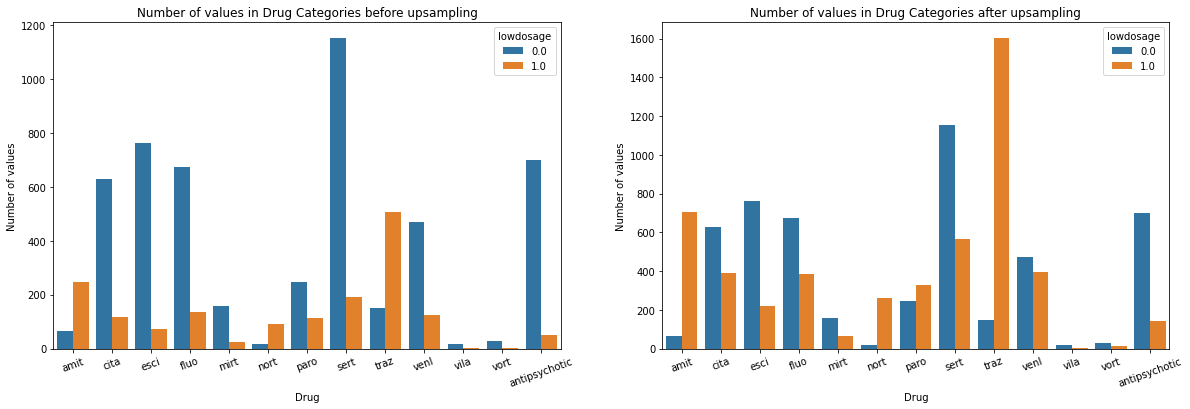

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))

plt.subplot(1, 2, 1)

sns.countplot(data=df_low,x='Drug',hue='lowdosage')
plt.title("Number of values in Drug Categories before upsampling")
plt.ylabel("Drug Category")
plt.ylabel("Number of values")
plt.xticks(range(len(df_low['Drug'].unique())), a, rotation=20)


plt.subplot(1, 2, 2)
sns.countplot(data=low_upsample,x='Drug',hue='lowdosage')
plt.title("Number of values in Drug Categories after upsampling")
plt.ylabel("Drug Category")
plt.ylabel("Number of values")
plt.xticks(range(len(low_upsample['Drug'].unique())), a, rotation=20)

plt.savefig('Impact_of_upsampling.png')

plt.show()


# Model Building

In [ ]:
x = low_upsample.drop(["lowdosage"], axis=1)
y = low_upsample["lowdosage"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
lr_model = LogisticRegression().fit(X_train,y_train)
lr_predictions= lr_model.predict(X_test)
accuracy_score(y_test, lr_predictions).round(2)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.59

<AxesSubplot:>

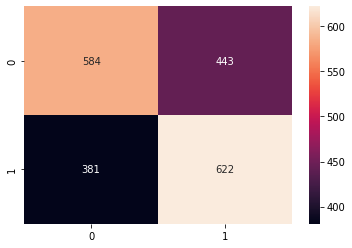

In [ ]:
cf = confusion_matrix(y_test,lr_predictions) 
sns.heatmap(cf, annot=True, fmt='g')

In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=123).fit(X_train,y_train)
rf_predictions= rf_model.predict(X_test)
accuracy_score(y_test, rf_predictions).round(2)

0.93

<AxesSubplot:>

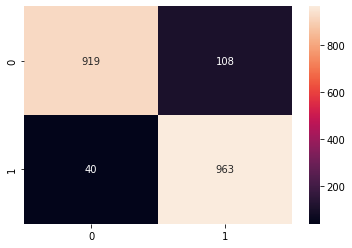

In [ ]:
cf_rf = confusion_matrix(y_test,rf_predictions) 
sns.heatmap(cf_rf, annot=True, fmt='g')


### Model Plotting

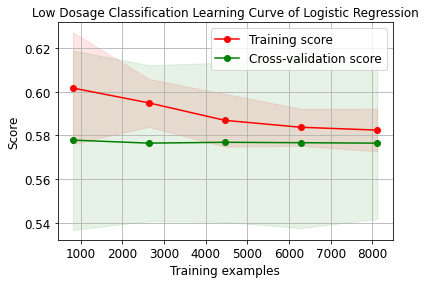

In [ ]:
skplt.estimators.plot_learning_curve(LogisticRegression(), x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Low Dosage Classification Learning Curve of Logistic Regression");
plt.savefig("learning_curve_low_lr.jpg")

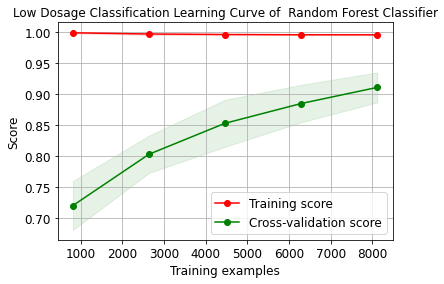

In [ ]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(), x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Low Dosage Classification Learning Curve of  Random Forest Classifier");
plt.savefig("learning_curve_low_rf.jpg")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


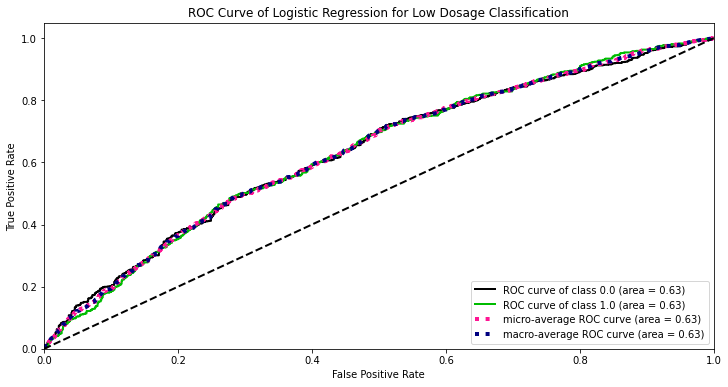

In [ ]:
rf_preditprob = lr_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, rf_preditprob,title="ROC Curve of Logistic Regression for Low Dosage Classification", figsize=(12,6));

plt.savefig('roc_curve_lr_low.png')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


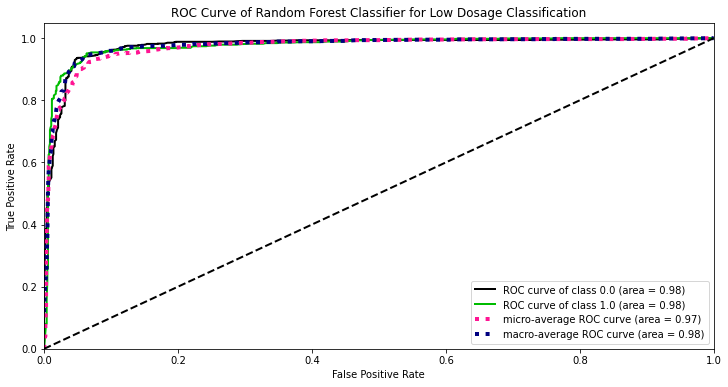

In [ ]:
rf_preditprob = rf_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, rf_preditprob,title="ROC Curve of Random Forest Classifier for Low Dosage Classification", figsize=(12,6));
plt.savefig('roc_curve_rf_low.png')

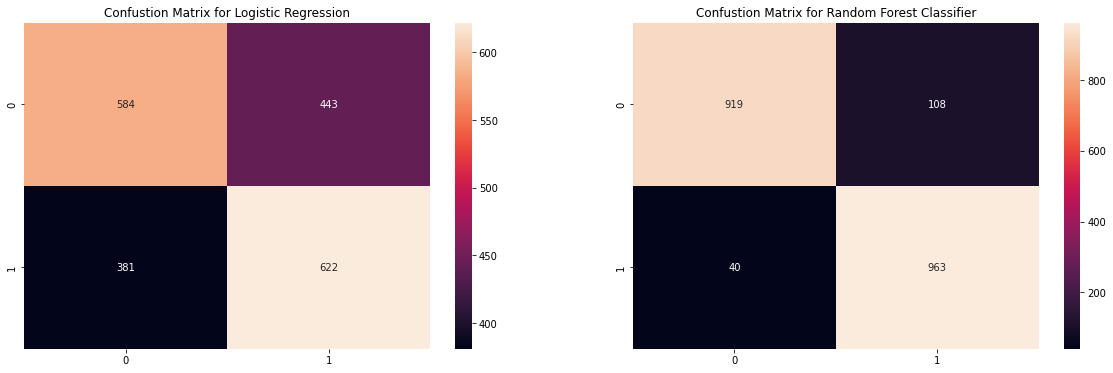

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cf, annot=True, fmt='g')
plt.title("Confustion Matrix for Logistic Regression")
plt.subplot(1, 2, 2)
sns.heatmap(cf_rf, annot=True, fmt='g')
plt.title("Confustion Matrix for Random Forest Classifier")

plt.savefig("confusion_matrix_low.jpg")
plt.show()

Feature: 0, Score: 0.03400
Feature: 1, Score: 0.09785
Feature: 2, Score: 0.08112
Feature: 3, Score: 0.05061
Feature: 4, Score: 0.07318
Feature: 5, Score: 0.02720
Feature: 6, Score: 0.05301
Feature: 7, Score: 0.07001
Feature: 8, Score: 0.02572
Feature: 9, Score: 0.03177
Feature: 10, Score: 0.16794
Feature: 11, Score: 0.28759


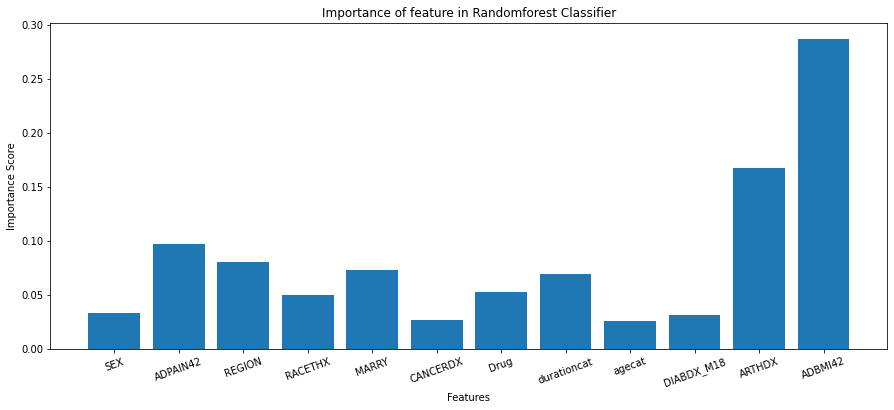

In [ ]:
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(15,6))
plt.title("Importance of feature in Randomforest Classifier")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(range(len(df_low.columns)-1),["SEX","ADPAIN42","REGION","RACETHX", "MARRY", "CANCERDX",'Drug','durationcat',
       'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42'],
       rotation=20)  # Set text labels and properties. 

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig('important_features_rf_low.png')
plt.show()


# Regression Model

In [ ]:
df_reg = df.copy()

In [ ]:
df_reg.drop(["optimaldosage","lowdosage","REGION"], axis=1,inplace=True)

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2["Drug"] = df_reg["Drug"]

In [ ]:
df_reg.isna().sum()

SEX               0
ADPAIN42          0
RACETHX           0
MARRY             0
CANCERDX          0
Drug              0
dosage         2614
durationcat     949
agecat          492
DIABDX_M18        0
ARTHDX            0
ADBMI42        3186
dtype: int64

In [ ]:
gb = df_reg.groupby(by=['Drug'], as_index=False)
def replace(g):
   mask = g<0
   g.loc[mask] = g[~mask].mean()
   return g
df_reg = gb.transform(replace)

In [ ]:
df_reg.shape

(9370, 11)

In [ ]:
df_reg["Drug"] = df2["Drug"]

In [ ]:
df_reg.head()

,SEX,ADPAIN42,RACETHX,MARRY,CANCERDX,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,Drug
0,2.0,1.0,2.0,1.0,2.0,NaN,1.0,1.0,2.0,2.0,21.4,10
1,1.0,1.0,2.0,1.0,2.0,20.0,1.0,1.0,2.0,2.0,30.6,10
2,2.0,1.0,2.0,1.0,2.0,100.0,2.0,2.0,2.0,2.0,28.9,18
3,2.0,4.0,2.0,2.0,2.0,NaN,3.0,5.0,2.0,1.0,30.1,3
4,2.0,3.0,1.0,1.0,2.0,60.0,1.0,4.0,2.0,2.0,25.1,26


In [ ]:
df_reg.describe()

,SEX,ADPAIN42,RACETHX,MARRY,CANCERDX,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,Drug
count,9370.000000,9370.000000,9370.000000,9370.000000,9370.000000,6756.000000,8421.000000,8878.000000,9370.000000,9370.000000,6184.000000,9370.000000
mean,1.689861,2.321335,2.106403,2.519851,1.803388,57.134845,1.974944,3.800068,1.799359,1.503050,30.014962,14.269264
std,0.462575,1.141698,0.749206,1.660501,0.388567,55.054950,0.867855,1.366743,0.400289,0.488110,7.010273,7.283295
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.555556,1.000000,1.000000,1.000000,1.000000,0.100000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,20.000000,1.000000,3.000000,2.000000,1.000000,25.800000,9.000000
50%,2.000000,2.092999,2.000000,2.000000,2.000000,40.000000,2.000000,4.000000,2.000000,1.576923,29.964344,16.000000
75%,2.000000,3.000000,2.000000,4.000000,2.000000,75.000000,3.000000,5.000000,2.000000,2.000000,32.300000,19.000000
max,2.000000,5.000000,5.000000,6.000000,2.000000,675.000000,3.000000,5.000000,2.000000,2.000000,69.100000,26.000000


In [ ]:
df_reg["ADBMI42"] = df_reg["ADBMI42"].fillna(df_reg["ADBMI42"].mean())
df_reg["durationcat"] = df_reg["durationcat"].fillna(round(df_reg["durationcat"].mean()))
df_reg["agecat"] = df_reg["agecat"].fillna(round(df_reg["agecat"].mean()))

In [ ]:
df_reg.isnull().sum()

SEX               0
ADPAIN42          0
RACETHX           0
MARRY             0
CANCERDX          0
dosage         2614
durationcat       0
agecat            0
DIABDX_M18        0
ARTHDX            0
ADBMI42           0
Drug              0
dtype: int64

In [ ]:
df_reg["ADBMI42"].max()

69.1

# drug encoding

In [ ]:
drug_dict= {'amit':0,'amox':1,'bupr':2,'cita':3,'clom':4,'desi':5,'desv':6,'doxe':7,
            'dulo':8,'esci':9,'fluo':10,'imip':11,'levo':12,'mirt':13,'nefa':14,'nort':15,'paro':16,
           'prot':17,'sert':18,'traz':19, 'trim':20,'venl':21,'vila':22,'vort':23,'benzo':24,
            'moodstabilizer':25,'antipsychotic':26}

In [ ]:
# Remap the values of the dataframe
df_reg  = df_reg.replace({"Drug": drug_dict})

df_reg.head()

,SEX,ADPAIN42,REGION,RACETHX,MARRY,CANCERDX,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,Drug
0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,2.0,2.0,21.4,10
1,1.0,1.0,2.0,2.0,1.0,2.0,20.0,1.0,1.0,2.0,2.0,30.6,10
2,2.0,1.0,2.0,2.0,1.0,2.0,100.0,2.0,2.0,2.0,2.0,28.9,18
3,2.0,4.0,3.0,2.0,2.0,2.0,NaN,3.0,5.0,2.0,1.0,30.1,3
4,2.0,3.0,2.0,1.0,1.0,2.0,60.0,1.0,4.0,2.0,2.0,25.1,26


In [ ]:
a = df_reg["Drug"].unique()

a.sort()
print(a)

[ 0  3  9 10 13 15 16 18 19 21 22 23 26]


In [ ]:
df_reg = df_reg[df_reg["Drug"] != 'other']

In [ ]:
df_reg["Drug"] = pd.to_numeric(df_reg["Drug"])

In [ ]:
df_reg.shape

(9370, 13)

In [ ]:
df_reg.dropna(inplace=True)

In [ ]:
df_reg.shape

(6756, 12)

In [ ]:
df_reg.head()

,SEX,ADPAIN42,RACETHX,MARRY,CANCERDX,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,Drug
1,1.0,1.0,2.0,1.0,2.0,20.0,1.0,1.0,2.0,2.0,30.6,10
2,2.0,1.0,2.0,1.0,2.0,100.0,2.0,2.0,2.0,2.0,28.9,18
4,2.0,3.0,1.0,1.0,2.0,60.0,1.0,4.0,2.0,2.0,25.1,26
5,2.0,4.0,1.0,2.0,2.0,20.0,2.0,5.0,1.0,1.0,32.3,9
6,2.0,1.0,2.0,1.0,2.0,100.0,2.0,2.0,2.0,2.0,25.1,18


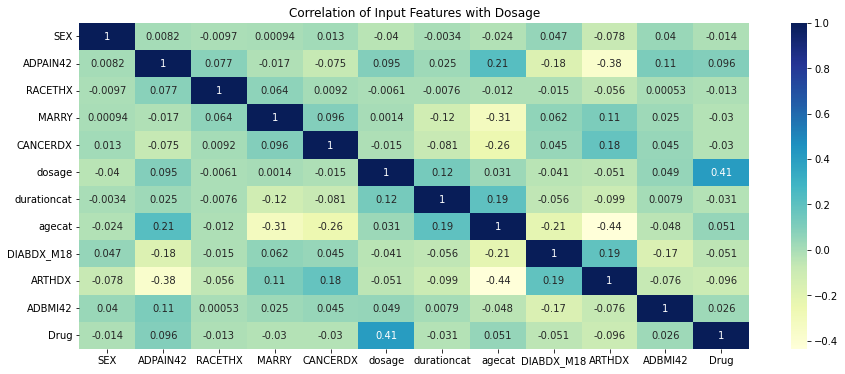

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df_reg.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation of Input Features with Dosage")
plt.savefig("correlation_regression.jpg")
plt.show()

## Outlier Detection

<Axes: >

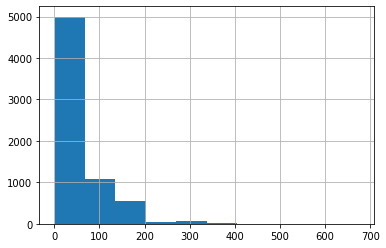

In [ ]:
df_reg['dosage'].hist()

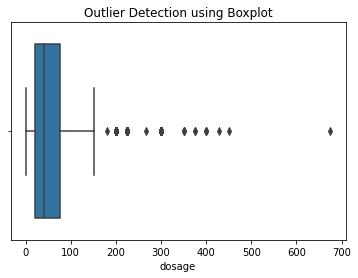

In [ ]:
sns.boxplot(data=df_reg, x="dosage")
plt.title("Outlier Detection using Boxplot")
plt.savefig("outlier.png")
plt.show()

In [ ]:
df_reg = df_reg[df_reg["dosage"] < 180]

In [ ]:
df_reg.shape

(6462, 12)

In [ ]:
df_reg.mean()

SEX             1.688332
ADPAIN42        2.340501
RACETHX         2.109254
MARRY           2.506035
CANCERDX        1.802277
dosage         48.963599
durationcat     1.964562
agecat          3.829310
DIABDX_M18      1.793259
ARTHDX          1.492422
ADBMI42        30.031668
Drug           14.222222
dtype: float64

In [ ]:
df_reg.reset_index(drop=True,inplace=True)

In [ ]:
df_reg.describe()

,SEX,ADPAIN42,RACETHX,MARRY,CANCERDX,dosage,durationcat,agecat,DIABDX_M18,ARTHDX,ADBMI42,Drug
count,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000,6462.000000
mean,1.688332,2.340501,2.109254,2.506035,1.802277,48.963599,1.964562,3.829310,1.793259,1.492422,30.031668,14.222222
std,0.463211,1.155997,0.758878,1.644983,0.390360,38.526831,0.820803,1.332666,0.404852,0.489349,5.820126,7.430521
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.555556,1.000000,1.000000,1.000000,1.000000,0.100000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,20.000000,1.000000,3.000000,2.000000,1.000000,28.700000,9.000000
50%,2.000000,2.092999,2.000000,2.000000,2.000000,40.000000,2.000000,4.000000,2.000000,1.553418,30.014962,16.000000
75%,2.000000,3.000000,2.000000,4.000000,2.000000,60.000000,3.000000,5.000000,2.000000,2.000000,30.700000,19.000000
max,2.000000,5.000000,5.000000,6.000000,2.000000,150.602410,3.000000,5.000000,2.000000,2.000000,69.100000,26.000000


# MODEL

In [ ]:
X = df_reg.drop(['dosage'], axis=1)
y = df_reg["dosage"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
rf_model = RandomForestRegressor().fit(X_train,y_train)
rf_predictions= rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)
print(rf_r2)
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_predictions))

print(rf_rmse)

0.4443654154610466
29.380680786953242


In [ ]:
sub_rf = pd.DataFrame({'y_test':y_test,'Predicted_Value':rf_predictions})
sub_rf.head()

,y_test,Predicted_Value
4295,150.0,63.083333
1858,40.0,29.900000
4805,20.0,24.500000
4060,50.0,79.346933
3400,100.0,70.500000


In [ ]:
sub_rf = sub_rf.iloc[:50]

In [ ]:
sub_rf.shape

(50, 2)

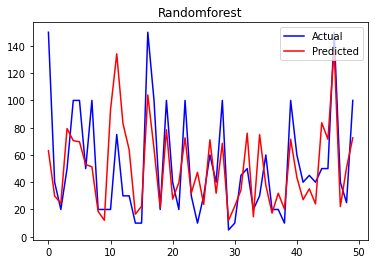

In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.plot(range(len(sub_rf['y_test'])), sub_rf['y_test'], color='blue')
    plt.plot(range(len(sub_rf['Predicted_Value'])), sub_rf['Predicted_Value'], color='red')
    # Function add a legend  
    plt.legend(["Actual", "Predicted"], loc ="upper right")
    plt.title(regressorName)
    plt.show()
    return
y_pred = sub_rf['Predicted_Value']

plotGraph(y_test, y_pred, "Randomforest")

In [ ]:
import xgboost as xg
import numpy as np

# Instantiation
xgb_r = xg.XGBRegressor(n_estimators=50)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
# RMSE Computation
xgb_rmse = np.sqrt(mean_squared_error(y_test, pred))
xgb_r2score = np.sqrt(r2_score(y_test, pred))
print("RMSE : % f" %(xgb_rmse))
print(xgb_r2score)

RMSE :  28.871067
0.680788834213217


In [ ]:
importance.round(2)

array([0.04, 0.04, 0.05, 0.04, 0.04, 0.08, 0.05, 0.04, 0.04, 0.04, 0.54],
      dtype=float32)

In [ ]:
names=[]
for i in df_reg.columns:
  names.append(i)

In [ ]:
dos =  names.pop(5)
names

['SEX',
 'ADPAIN42',
 'RACETHX',
 'MARRY',
 'CANCERDX',
 'durationcat',
 'agecat',
 'DIABDX_M18',
 'ARTHDX',
 'ADBMI42',
 'Drug']

In [ ]:
# get importance
importance = xgb_r.feature_importances_

importance = importance.round(3)

In [ ]:
# width = 0.6  # the width of the bars: can also be len(x) sequence


# fig, ax = plt.subplots(figsize=(15,8))
# bottom = np.zeros(3)

# p = ax.bar([x for x in range(len(importance))], importance)
# ax.bar_label(p)
# #plt.xticks(names)
# plt.xticks(range(len(df_reg.columns)-1),names,rotation = 20)
# ax.set_title('Number of penguins by sex')
# ax.legend()

# plt.show()

Feature: 0, Score: 0.03625
Feature: 1, Score: 0.04106
Feature: 2, Score: 0.04859
Feature: 3, Score: 0.04198
Feature: 4, Score: 0.04438
Feature: 5, Score: 0.08096
Feature: 6, Score: 0.04629
Feature: 7, Score: 0.04089
Feature: 8, Score: 0.03821
Feature: 9, Score: 0.04083
Feature: 10, Score: 0.54055


AttributeError: ignored

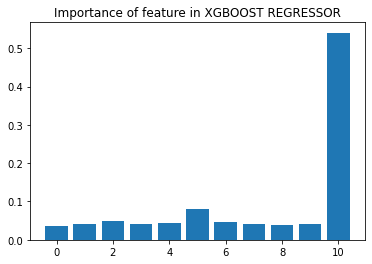

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
fig, ax = plt.subplots()
#ax = plt.figure(figsize=(15,6))
ax.set_title("Importance of feature in XGBOOST REGRESSOR")
#ax.xlabel("Features")
#ax.ylabel("Importance Score")
#ax.xticks(range(len(df_reg.columns)-1),["SEX","ADPAIN42","RACETHX", "MARRY", "CANCERDX",'Drug','durationcat',
  #     'agecat', 'DIABDX_M18', 'ARTHDX', 'ADBMI42'],
 #      rotation=20)  # Set text labels and properties. 

# plot feature importance

ax.bar([x for x in range(len(importance))], importance)
ax.bar_label(importance.compressed(), label_type='center')
ax.savefig('important_features_xgb_r.png')
ax.show()


In [ ]:
sub = pd.DataFrame({'y_test':y_test,'Predicted_Value':pred})
sub.head()

,y_test,Predicted_Value
4295,150.0,66.152374
1858,40.0,35.284870
4805,20.0,29.958136
4060,50.0,82.541634
3400,100.0,70.838280


In [ ]:
sub = sub.iloc[:50]

In [ ]:
sub["xgb_pred"] = sub["Predicted_Value"]

<ipython-input-56-eec6b9f8719e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-56-eec6b9f8719e>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


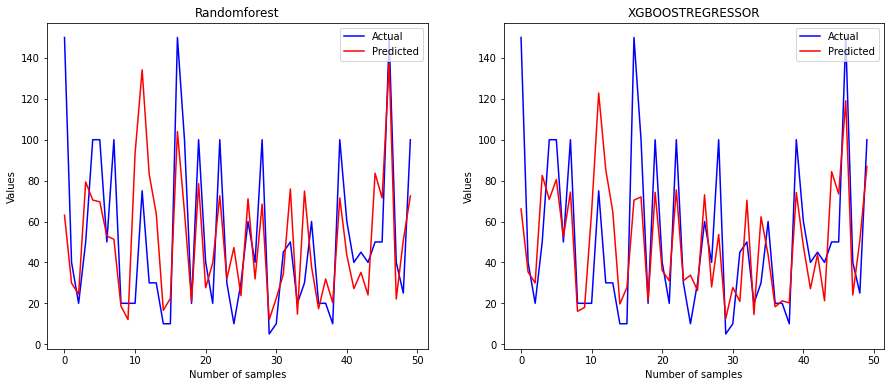

In [ ]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)


plt.plot(range(len(sub_rf['y_test'])), sub_rf['y_test'], color='blue')
plt.plot(range(len(sub_rf['Predicted_Value'])), sub_rf['Predicted_Value'], color='red')
# Function add a legend  
plt.legend(["Actual", "Predicted"], loc ="upper right")
plt.title("Randomforest")
plt.xlabel("Number of samples")
plt.ylabel("Values")

plt.subplot(1, 2, 2)
plt.plot(range(len(sub['y_test'])), sub['y_test'], color='blue')
plt.plot(range(len(sub['Predicted_Value'])), sub['Predicted_Value'], color='red')
    # Function add a legend  
plt.legend(["Actual", "Predicted"], loc ="upper right")
plt.title("XGBOOSTREGRESSOR")
plt.xlabel("Number of samples")
plt.ylabel("Values")

plt.savefig("rfvsxgb.png")
plt.show()

In [ ]:
data = [['Random Forest Regressor',rf_r2,'r2'],['Random Forest Regressor',rf_rmse,'rmse'],
        ["XGBoost Regressor",xgb_r2score,'r2'],["XGBoost Regressor",xgb_rmse,'rmse']]

In [ ]:
df_comp = pd.DataFrame(data,columns=["Model","score",'label'])

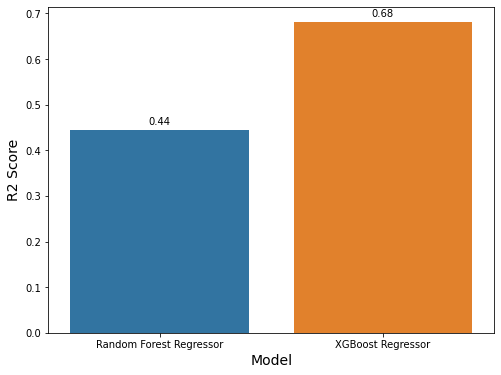

In [ ]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(x="Model",y="score",data=df_comp[df_comp['label']=='r2'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Model", size=14)
plt.ylabel("R2 Score", size=14)
plt.savefig("r2_bar.png")

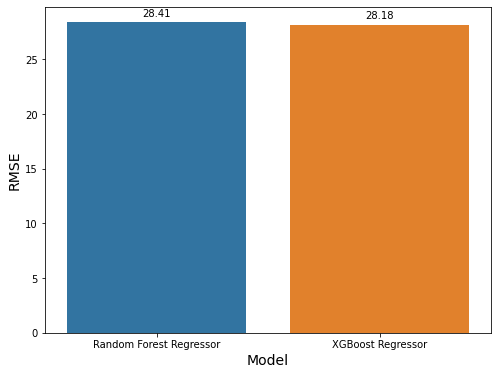

In [ ]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(x="Model",y="score",data=df_comp[df_comp['label']=='rmse'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Model", size=14)
plt.ylabel("RMSE", size=14)
plt.savefig("rmse.png")

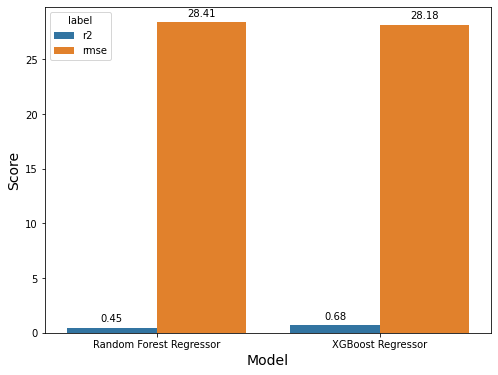

In [ ]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(x="Model",y="score",hue="label",data=df_comp)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Model", size=14)
plt.ylabel("Score", size=14)
plt.savefig("model_comp_bar.png")

In [ ]:
df_r2 = df_comp[df_comp['label'] == 'r2']
df_rmse = df_comp[df_comp['label'] == 'rmse']


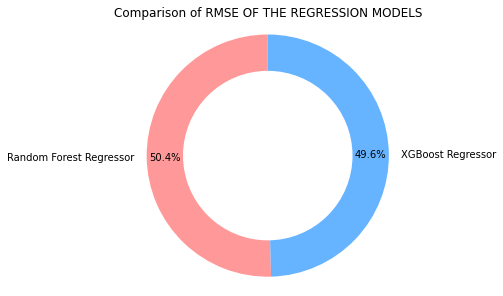

In [ ]:
# Pie chart

#colors
colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()
ax1.pie(df_rmse.score,autopct='%1.1f%%', pctdistance=0.85, colors = colors, labels=df_rmse.Model,  startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Comparison of RMSE OF THE REGRESSION MODELS")
plt.savefig("rmse_comp_donut.png")
plt.show()

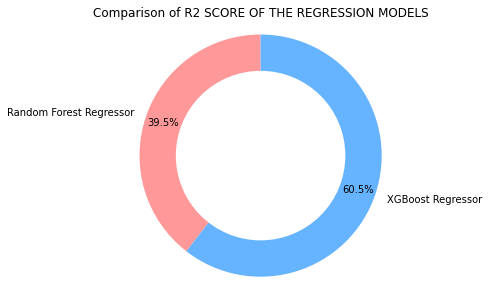

In [ ]:
# Pie chart

#colors
colors = ['#ff9999','#66b3ff']
 
fig1, ax1 = plt.subplots()
ax1.pie(df_r2.score,autopct='%1.1f%%', pctdistance=0.85, colors = colors, labels=df_r2.Model,  startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Comparison of R2 SCORE OF THE REGRESSION MODELS")
plt.savefig("r2_comp_donut.png")

plt.show()

In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 20,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.5)

%time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2score = r2_score(y_test, y_pred_xgb)

print("MAE: ", mae_xgb)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
print("r2 score: ", r2score)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


CPU times: user 13.2 s, sys: 1.21 s, total: 14.4 s
Wall time: 8.52 s
MAE:  19.847481755824287
MSE:  761.8263616299205
RMSE:  27.601202177258884
r2 score:  0.48128626376008954


In [ ]:
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(xgb_r, 'xgb_r.pkl')

['xgb_r.pkl']